In [1]:
import os
import sys

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_dir = os.path.dirname(notebook_dir)

if project_dir not in sys.path:
    sys.path.append(project_dir)

In [2]:
# Import Data
import pandas as pd
tweets_df = pd.read_csv(r"C:\Users\johna\anaconda3\envs\twitter-influence-env\twitter-influence\data\01_raw\top_accounts_details.csv")
tweets_df['date'] = pd.to_datetime(tweets_df['creation_date'], format='%a %b %d %H:%M:%S +0000 %Y')
tweets_df['month_year'] = tweets_df['date'].apply(lambda x: x.strftime('%Y-%m'))
tweets_df['date_day'] = tweets_df['date'].apply(lambda x: x.strftime('%Y-%m-%d'))

# calculate per follower metrics 
tweets_df['favorite_count_pf'] = tweets_df['favorite_count']/ tweets_df['follower_count']
tweets_df['retweet_count_pf'] = tweets_df['retweet_count']/ tweets_df['follower_count']
tweets_df['quote_count_pf'] = tweets_df['quote_count']/ tweets_df['follower_count']
tweets_df['reply_count_pf'] = tweets_df['reply_count']/ tweets_df['follower_count']


tweets_df.head()

,tweet_id,creation_date,text,user_id,user_creation_date,username,name,follower_count,following_count,number_of_tweets,...,video_view_count,in_reply_to_status_id,quoted_status_id,date,month_year,date_day,favorite_count_pf,retweet_count_pf,quote_count_pf,reply_count_pf
0,1640814094822383617,Tue Mar 28 20:32:19 +0000 2023,Grateful to all the first responders and volun...,813286,Mon Mar 05 22:08:25 +0000 2007,BarackObama,Barack Obama,133042583,562683,16792,...,NaN,NaN,NaN,2023-03-28 20:32:19,2023-03,2023-03-28,0.000048,0.000007,2.330081e-07,0.000002
1,1640485381459025920,Mon Mar 27 22:46:08 +0000 2023,We are failing our children. Guns are now the ...,813286,Mon Mar 05 22:08:25 +0000 2007,BarackObama,Barack Obama,133042583,562683,16792,...,2833072.0,NaN,NaN,2023-03-27 22:46:08,2023-03,2023-03-27,0.000917,0.000175,1.643835e-05,0.000127
2,1639039698675937281,Thu Mar 23 23:01:30 +0000 2023,I hope their stories inspire you to help us pr...,813286,Mon Mar 05 22:08:25 +0000 2007,BarackObama,Barack Obama,133042583,562683,16792,...,NaN,1.639040e+18,NaN,2023-03-23 23:01:30,2023-03,2023-03-23,0.000023,0.000003,2.029425e-07,0.000004
3,1639039601623851009,Thu Mar 23 23:01:07 +0000 2023,To celebrate the 13th anniversary of the Affor...,813286,Mon Mar 05 22:08:25 +0000 2007,BarackObama,Barack Obama,133042583,562683,16792,...,442921.0,NaN,NaN,2023-03-23 23:01:07,2023-03,2023-03-23,0.000095,0.000015,1.142491e-06,0.000006
4,1638956751910215711,Thu Mar 23 17:31:54 +0000 2023,I know so many of you have a story of how acce...,813286,Mon Mar 05 22:08:25 +0000 2007,BarackObama,Barack Obama,133042583,562683,16792,...,NaN,1.638957e+18,NaN,2023-03-23 17:31:54,2023-03,2023-03-23,0.000034,0.000005,2.480409e-07,0.000002


In [3]:
tweets_df['username'].describe()

count            4108
unique            399
top       BBCBreaking
freq              100
Name: username, dtype: object

In [4]:
from scripts.text_processing.sentiment_analysis import SentimentAnalyzer

# sentiment analyser, specify model
analyzer = SentimentAnalyzer('cardiffnlp/twitter-roberta-base-sentiment-latest')

# Get sentiment analysis
tweets_with_sentiment = analyzer.get_sentiment(tweets_df)


C:\Users\johna\anaconda3\envs\twitter-influence-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
# Get topics 
from scripts.topics.tfidf import ClusterBasedTFIDF

tfidf_processor = ClusterBasedTFIDF(text_col='text', cluster_col='user_id', n_topics=1, n_words=5)
tweets_with_topics = tfidf_processor.fit_transform(tweets_with_sentiment)
tweets_with_topics.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\johna\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\johna\anaconda3\envs\twitter-influence-env\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  warnings.warn(


,tweet_id,creation_date,text,user_id,user_creation_date,username,name,follower_count,following_count,number_of_tweets,...,month_year,date_day,favorite_count_pf,retweet_count_pf,quote_count_pf,reply_count_pf,cleaned_text,sentiment,sentiment_score,topic
0,1640814094822383617,Tue Mar 28 20:32:19 +0000 2023,Grateful to all the first responders and volun...,813286,Mon Mar 05 22:08:25 +0000 2007,BarackObama,Barack Obama,133042583,562683,16792,...,2023-03,2023-03-28,0.000048,0.000007,2.330081e-07,0.000002,Grateful to all the first responders and volun...,positive,0.910717,vote year make family people
1,1640485381459025920,Mon Mar 27 22:46:08 +0000 2023,We are failing our children. Guns are now the ...,813286,Mon Mar 05 22:08:25 +0000 2007,BarackObama,Barack Obama,133042583,562683,16792,...,2023-03,2023-03-27,0.000917,0.000175,1.643835e-05,0.000127,We are failing our children. Guns are now the ...,negative,0.916740,vote year make family people
2,1639039698675937281,Thu Mar 23 23:01:30 +0000 2023,I hope their stories inspire you to help us pr...,813286,Mon Mar 05 22:08:25 +0000 2007,BarackObama,Barack Obama,133042583,562683,16792,...,2023-03,2023-03-23,0.000023,0.000003,2.029425e-07,0.000004,I hope their stories inspire you to help us pr...,positive,0.904411,vote year make family people
3,1639039601623851009,Thu Mar 23 23:01:07 +0000 2023,To celebrate the 13th anniversary of the Affor...,813286,Mon Mar 05 22:08:25 +0000 2007,BarackObama,Barack Obama,133042583,562683,16792,...,2023-03,2023-03-23,0.000095,0.000015,1.142491e-06,0.000006,To celebrate the 13th anniversary of the Affor...,positive,0.968127,vote year make family people
4,1638956751910215711,Thu Mar 23 17:31:54 +0000 2023,I know so many of you have a story of how acce...,813286,Mon Mar 05 22:08:25 +0000 2007,BarackObama,Barack Obama,133042583,562683,16792,...,2023-03,2023-03-23,0.000034,0.000005,2.480409e-07,0.000002,I know so many of you have a story of how acce...,positive,0.904533,vote year make family people


In [9]:
tweets_with_sentiment['sentiment_mode'] = tweets_with_sentiment['sentiment']

influence_metrics = tweets_with_sentiment.groupby('user_id').agg(
    {
        'name': [lambda x: x.mode().iloc[0] if not x.mode().empty else None],
        'favorite_count_pf': ['mean'],
        'retweet_count_pf': ['mean'],
        'quote_count_pf': ['mean'],
        'reply_count_pf': ['mean'],
        'tweet_id': ['count'],
        'sentiment': [lambda x: round(x.value_counts(normalize=True), 2).to_dict()], 
        'sentiment_mode': [lambda x: x.mode().iloc[0] if not x.mode().empty else None],
        'follower_count': ['mean'],
        'date_day': [lambda x: x.nunique()]



    }
)

# Calculate the average daily tweets
influence_metrics['avg_daily_tweets'] = influence_metrics[('tweet_id', 'count')] / influence_metrics[('date_day', '<lambda>')]



# Flatten the MultiIndex columns
influence_metrics.columns = ['_'.join(col).strip() for col in influence_metrics.columns.values]

# Reset the index to move the 'username' back to a column
influence_metrics.reset_index(inplace=True)
influence_metrics_final = influence_metrics.merge(tweets_with_topics[['user_id', 'topic']].drop_duplicates(), on='user_id')

influence_metrics_final.rename(columns={'name_<lambda>':'name'}, inplace=True)

In [7]:
from scripts.clustering.cluster import ClusterAnalysis

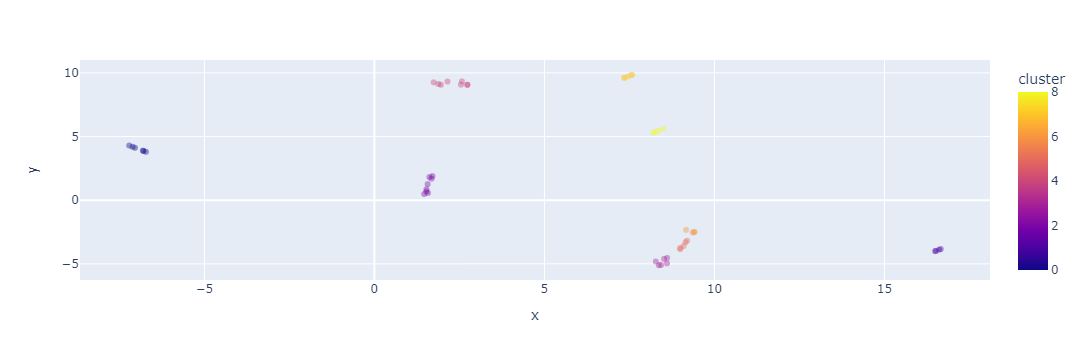

In [18]:
# Create a sample DataFrame
df = influence_metrics_final

# Run UmapHdbscanBokeh
ca = ClusterAnalysis(df, n_neighbors=4, min_cluster_size=3, min_dist=0.001)
ca.run()